# Aykırı Gözlem Analizi

## Aykırı Gözlemleri Yakalamak

In [79]:
import seaborn as sns
import pandas as pd 
import numpy as np

In [81]:
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [83]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

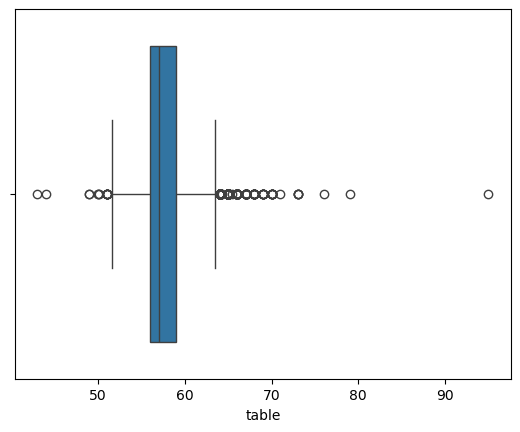

In [85]:
sns.boxplot(x=df_table)

In [87]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

In [34]:
Q1

56.0

In [36]:
Q3

59.0

In [38]:
IQR

3.0

In [89]:
alt_sinir=Q1-IQR
alt_sinir

53.0

In [91]:
üst_sinir=Q3+IQR
üst_sinir

62.0

In [62]:
((df_table<alt_sinir)|(df_table>üst_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [93]:
aykirialt_tf=(df_table<alt_sinir)
aykirialt_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [22]:
df_table[aykirialt_tf]

243      52.0
995      52.0
1198     52.0
1515     51.0
3238     50.1
         ... 
51068    52.0
51606    52.0
52651    52.0
53026    52.0
53688    52.0
Name: table, Length: 76, dtype: float64

In [24]:
df_table[aykirialt_tf].index

Index([  243,   995,  1198,  1515,  3238,  3979,  4150,  4268,  5114,  5144,
        5207,  5979,  7418,  8853, 10540, 10676, 10992, 11312, 11368, 11804,
       13092, 15230, 15468, 15506, 15858, 16010, 17164, 18558, 20778, 21086,
       21406, 22701, 23408, 24815, 25179, 25607, 26387, 26431, 27359, 27593,
       28812, 29554, 30489, 31863, 32000, 32629, 33112, 33408, 33552, 33586,
       35633, 35828, 35940, 36077, 38834, 40577, 41208, 41858, 42771, 42958,
       43368, 43412, 45495, 45798, 46040, 46531, 46895, 47630, 48019, 48316,
       50730, 51068, 51606, 52651, 53026, 53688],
      dtype='int64')

## Silme Yaklaşımı

In [26]:
import pandas as pd

In [28]:
type(df_table)

pandas.core.series.Series

In [97]:
df_table=pd.DataFrame(df_table)

In [32]:
df_table.shape

(53940, 1)

In [57]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (üst_sinir))).any(axis=1)]
t_df.shape

(52668, 1)

## Ortalama İle Doldurma 

In [68]:
df_table[aykirialt_tf]

,table
243,52.0
995,52.0
1198,52.0
1515,51.0
3238,50.1
...,...
51068,52.0
51606,52.0
52651,52.0
53026,52.0


In [70]:
df_table[aykirialt_tf]=df_table.mean()

In [72]:
df_table[aykirialt_tf]

,table
243,57.457184
995,57.457184
1198,57.457184
1515,57.457184
3238,57.457184
...,...
51068,57.457184
51606,57.457184
52651,57.457184
53026,57.457184


## Baskılama Yöntemi

In [99]:
df_table[aykirialt_tf]

,table
243,52.0
995,52.0
1198,52.0
1515,51.0
3238,50.1
...,...
51068,52.0
51606,52.0
52651,52.0
53026,52.0


In [111]:
baskılama=df_table.copy()

In [113]:
baskılama[(df_table>üst_sinir).any(axis=1)]    #Üst Sınırın Üstündeki Aykırı Değerler

,table
2,65.0
43,63.0
91,69.0
122,63.0
145,64.0
...,...
53785,65.0
53825,63.0
53828,63.0
53840,63.0


In [119]:
baskılama[(df_table>üst_sinir).any(axis=1)]=üst_sinir  #Üst Sınırın Üstündeki Değerleri Üst Sınıra eşitleme
baskılama[(df_table>üst_sinir).any(axis=1)]                      

,table
2,62.0
43,62.0
91,62.0
122,62.0
145,62.0
...,...
53785,62.0
53825,62.0
53828,62.0
53840,62.0


In [121]:
baskılama[(df_table<alt_sinir).any(axis=1)] #Alt Sınırın Altındaki Aykırı Değerler

,table
243,52.0
995,52.0
1198,52.0
1515,51.0
3238,50.1
...,...
51068,52.0
51606,52.0
52651,52.0
53026,52.0


In [125]:
baskılama[(df_table<alt_sinir).any(axis=1)]=alt_sinir  #Alt Sınırın Altındaki Değerlerin Alt Sınıra Eşitlenmesi
baskılama[(df_table<alt_sinir).any(axis=1)]

,table
243,53.0
995,53.0
1198,53.0
1515,53.0
3238,53.0
...,...
51068,53.0
51606,53.0
52651,53.0
53026,53.0


## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [137]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [141]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [143]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [145]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [149]:
df_scores=clf.negative_outlier_factor_

In [151]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [163]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [171]:
esik_deger=np.sort(df_scores)[13]

In [175]:
yeni_df=df[df_scores>esik_deger]   #Aykırı Değerlerden Arındırılmış DataFrame
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [179]:
Aykiri_df=df[df_scores<esik_deger]   #Aykırı Değerlerin DataFrame'i
Aykiri_df

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


## Baskılama Yöntemi

In [331]:
baskilanacak_deger=df[df_scores==esik_deger]

In [333]:
baskılama=df.copy()

In [335]:
aykiri=baskılama[df_scores<esik_deger]
aykiri

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [339]:
res=aykiri.to_records(index=False)##Değerleri İndexlerinden Ayırıp Bir Array Haline çevirdik
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [349]:
res[:]=baskilanacak_deger.to_records(index=False)##İndexinden Ayırdığıız baskilanacak Değeri Aykırı Gözlemlerimize
res                                              ##Atama İşlemini yapıyoruz

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [363]:
baskılama[df_scores<esik_deger]=pd.DataFrame(res,index=baskılama[df_scores<esik_deger].index)
baskılama[df_scores<esik_deger]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19
